### This is Example 4.3. Gambler’s Problem from Sutton's book.

A gambler has the opportunity to make bets on the outcomes of a sequence of coin flips. 
If the coin comes up heads, he wins as many dollars as he has staked on that flip; 
if it is tails, he loses his stake. The game ends when the gambler wins by reaching his goal of $100, 
or loses by running out of money. 

On each flip, the gambler must decide what portion of his capital to stake, in integer numbers of dollars. 
This problem can be formulated as an undiscounted, episodic, finite MDP. 

The state is the gambler’s capital, s ∈ {1, 2, . . . , 99}.
The actions are stakes, a ∈ {0, 1, . . . , min(s, 100 − s)}. 
The reward is zero on all transitions except those on which the gambler reaches his goal, when it is +1.

The state-value function then gives the probability of winning from each state. A policy is a mapping from levels of capital to stakes. The optimal policy maximizes the probability of reaching the goal. Let p_h denote the probability of the coin coming up heads. If p_h is known, then the entire problem is known and it can be solved, for instance, by value iteration.


In [3]:
import numpy as np
import sys
import matplotlib.pyplot as plt
if "../" not in sys.path:
  sys.path.append("../") 


### Exercise 4.9 (programming)

Implement value iteration for the gambler’s problem and solve it for p_h = 0.25 and p_h = 0.55.



In [1]:
def value_iteration_for_gamblers(p_h, theta=0.0001, discount_factor=1.0):
    """
    Args:
        p_h: Probability of the coin coming up heads
    """
    
    def one_step_lookahead(s, V, rewards):
        """
        Helper function to calculate the value for all action in a given state.
        
        Args:
            s: The gambler’s capital. Integer.
            V: The vector that contains values at each state. 
            rewards: The reward vector.
                        
        Returns:
            A vector containing the expected value of each action. 
            Its length equals to the number of actions.
        """
        
        # Implement!
        
        return A
    
    # Implement!
    
    return policy, V

In [4]:
policy, v = value_iteration_for_gamblers(0.25)

print("Optimized Policy:")
print(policy)
print("")

print("Optimized Value Function:")
print(v)
print("")

TypeError: data type not understood

In [5]:
# Plotting Final Policy (action stake) vs State (Capital)

# Implement!

In [6]:
# Plotting Capital vs Final Policy

# Implement!


In [ ]:
s = np.random.randint(low=1, high=99) #  random state init (capital)
for state in range(s): #  Loop over states
    possible_actions = np.zeros(np.min(s,100-s))

    for a in range(possible_actions.size): #  Loop over all actions (stakes)
        rewards = (p_h * (s + a)) * ((s+a)>=100) #  Reward only if capital > 100
        next_states = p_h*V[s+a]+ (1-p_h)*V[s-a]
        possible_actions[a] = rewards + discount_factor*next_states
    
    best_action = np.max(possible_actions)
    V[s] = best_action
        

In [39]:
def value_iteration_for_gamblers(p_h, theta=0.0001, discount_factor=1.0):
    """
    Args:
      p_h: Probability of the coin coming up heads
    """
    V = np.zeros(100)
    vs = np.zeros(100)
    #while True:
    for k in range(10000):
        policy = np.zeros((99, 99))
        v = np.copy(V)
        s = np.random.randint(low=50, high=99)  # random state init (capital)
        for state in range(s):  # Loop over states

            possible_actions = np.zeros(np.min((s, 100 - s))+1)
            for a in range(possible_actions.size):  # Loop over all actions (stakes)
                rewards = (p_h * (s + a)) * ((s + a) >= 100)


                next_states = (1 - p_h) * V[s - a] + ( p_h * V[s + a]if (s+a) < 100 else 0)
                possible_actions[a] = rewards + discount_factor * next_states
                if (s+a) >= 100 or (s-a) <= 0:
                    continue

            best_action, idx = np.max(possible_actions), np.argmax(possible_actions)
            V[s] = best_action
            policy[s, idx] = 1
        #print(V)
        #Break if 'finished'
        delta = np.linalg.norm(v - V)
        print(delta)
        print(delta)
        if delta < theta and delta != 0:
            break
    return policy, V

In [17]:
policy, v = value_iteration_for_gamblers(0.25)

print("Optimized Policy:")
print(policy)
print("")

print("Optimized Value Function:")
print(v)
print("")

25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
43.75
43.75
25.0
25.0
25.0
25.0
32.8125
32.8125
39.0625
39.0625
25.0
25.0
7.8125
7.8125
25.0
25.0
54.296875
54.296875
28.515625
28.515625
28.515625
28.515625
32.8125
32.8125
18.75
18.75
38.18359375
38.18359375
0.0
0.0
43.75
43.75
32.8125
32.8125
25.87890625
25.87890625
0.0
0.0
29.6875
29.6875
6.25
6.25
33.203125
33.203125
30.56640625
30.56640625
25.0
25.0
0.5126953125
0.5126953125
0.164794921875
0.164794921875
0.87890625
0.87890625
6.0302734375
6.0302734375
1.5380859375
1.5380859375
43.75
43.75
25.2197265625
25.2197265625
25.384521484375
25.384521484375
0.0
0.0
44.903564453125
44.903564453125
0.2197265625
0.2197265625
27.215576171875
27.215576171875
1.43280029296875
1.43280029296875
0.0
0.0
43.359375
43.359375
44.82460021972656
44.82460021972656
33.203125
33.203125
0.054931640625
0.054931640625
0.0
0.0
0.0
0.0
29.6875
29.6875
0.164794921875
0.164794921875
1.4817237854003906
1.4817237854003906
0.06759166717529297
0.067591667175

In [11]:
for x in range(10):
    i = np.array((5,2,3))
    a = list(i)
    i[0] = 2 
    print('a', a)
    print('i', i)

a [5, 2, 3]
i [2 2 3]
a [5, 2, 3]
i [2 2 3]
a [5, 2, 3]
i [2 2 3]
a [5, 2, 3]
i [2 2 3]
a [5, 2, 3]
i [2 2 3]
a [5, 2, 3]
i [2 2 3]
a [5, 2, 3]
i [2 2 3]
a [5, 2, 3]
i [2 2 3]
a [5, 2, 3]
i [2 2 3]
a [5, 2, 3]
i [2 2 3]


In [59]:


def value_iteration_for_gamblers(p_h, theta=0.00000001, discount_factor=1.0):
    """
    Args:
      p_h: Probability of the coin coming up heads
    """
    values = np.zeros(100)
    
    #v = np.zeros(100)
    #while True:
    for k in range(1000):
        policy = np.zeros((99, 99))
        v = list(values)
        s = np.random.randint(low=1, high=99)  # random state init (capital)
        for state in range(s):  # Loop over states

            possible_actions = np.zeros(np.min((s, 100 - s))+1)
            for a in range(possible_actions.size):  # Loop over all actions (stakes)
                rewards = p_h * ((s + a) >= 100)

                # if rewards != 0:
                #     print('dw')
                next_states = (1 - p_h) * values[s - a] + ( p_h * values[s + a]if (s+a) < 100 else 0)
                possible_actions[a] = rewards + discount_factor * next_states
                if (s+a) >= 100 or (s-a) <= 0:
                    continue

            best_action, idx = np.max(possible_actions), np.argmax(possible_actions)
            values[s] = best_action
            policy[s, idx] = 1
      #print(values)
      # Break if 'finished'
        delta = np.linalg.norm(np.asarray(v) - values)
        if delta < theta and delta != 0:
            break

    return policy, values

policy, v = value_iteration_for_gamblers(0.4)

print("Optimized Policy:")
print(policy)
print("")

print("Optimized Value Function:")
print(v)
print("")

41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17

37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
5
5
5
5
38
38
38
38
38
38
38
38
38
38
38
38

31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9

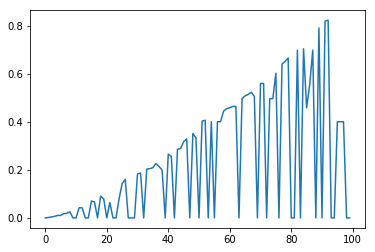

In [60]:
plt.plot(np.arange(v.shape[0]),v)

In [53]:
def value_iteration_for_gamblers(p_h, theta=0.000001, discount_factor=1.0):
    """
    Args:
      p_h: Probability of the coin coming up heads
    """
    V = np.zeros(100)
    #while True:
    while True:
        #policy = np.zeros((99, 99))
        policy = np.zeros((99, 50))
        v = np.copy(V)

        for s_value, s_idx in zip(range(1,100), range(99)):  # Loop over states

            possible_actions = np.zeros(np.min((s_value, 100 - s_value))+1)
            #print(possible_actions.shape[0])
            for a in range(possible_actions.size):  # Loop over all actions (stakes)
                rewards = (p_h * (s_value + a)) * ((s_value + a) >= 100)

                try:
                    next_states = (1 - p_h) * V[s_value - a] + ( p_h * V[s_value + a]if (s_value+a) <= 100 else 0)
                
                except:
                    pass
                possible_actions[a] = rewards + discount_factor * next_states
                
                if (s_value+a) >= 100 or (s_value-a) <= 0:
                    continue

            best_action, idx = np.max(possible_actions), np.argmax(possible_actions)
            V[s_idx] = best_action
            try:
                policy[s_idx, idx] = 1
            except:
                pass
        print(V)
        #Break if 'finished'
    
        delta = np.linalg.norm(v - V)
        #print(delta)
        if delta < theta and delta != 0:
            break
    return policy, V

In [44]:
policy, v = value_iteration_for_gamblers(0.4)

print("Optimized Policy:")
print(policy)
print("")

print("Optimized Value Function:")
print(v)
print("")

[ 0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.     40.     40.     40.     40.     40.
 40.     40.     40.     40.     40.     40.     40.     40.     40.
 40.     40.     40.     40.     40.     40.     40.     40.     40.
 40.     64.     64.     64.     64.     64.     64.     64.     64.
 64.     64.     64.     64.     78.4    78.4    78.4    78.4    78.4
 78.4    87.04   87.04   87.04   92.224  92.224  95.3344 40.     40.
  0.    ]
[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.       

 99.99999999 99.99999987 40.          0.        ]
[46.92031389 48.50332225 49.93178485 51.25700397 52.51449406 53.72887932
 54.91726396 56.09154947 57.26002551 58.42845921 59.60083795 60.7798726
 61.96733522 63.16428268 64.37120188 65.58810199 66.81457133 68.0498119
 69.29266063 70.5416042  71.79479224 73.05005246 74.30491012 75.55661338
 76.8021652  78.0383621  79.2618393  80.46912136 81.65667712 82.82097763
 83.95855513 85.06606165 86.14032536 87.17840302 88.17762716 89.1356466
 90.05045944 90.92043772 91.74434343 92.52133601 93.25097129 93.93319288
 94.56831621 95.15700652 95.70025126 96.19932824 96.65577021 97.0713271
 97.44792735 97.78763736 98.09262661 98.36512213 98.60739421 98.8216981
 99.01030579 99.17539256 99.31916606 99.44359608 99.5507973  99.64237459
 99.72040974 99.78594519 99.84118527 99.88648205 99.92404538 99.95442723
 99.97265634 99.9835938  99.99015628 99.99409377 99.99645626 99.99787376
 99.99872425 99.99923455 99.99954073 99.99972444 99.99983466 99.9999008
 99.999

 100.         100.         100.          40.           0.        ]
[ 98.42809299  98.64696173  98.83210458  98.99001857  99.12565567
  99.24282933  99.34451155  99.43304984  99.51032552  99.57786935
  99.63694583  99.68861509  99.73377789  99.77320909  99.80758181
  99.83748622  99.86344237  99.88591174  99.90530414  99.92198458
  99.93628046  99.94847717  99.95884669  99.96758925  99.9749773
  99.98107363  99.98628168  99.99035151  99.99409377  99.99645626
  99.99787376  99.99872425  99.99923455  99.99954073  99.99972444
  99.99983466  99.9999008   99.99994048  99.99996429  99.99997857
  99.99998714  99.99999229  99.99999537  99.99999722  99.99999833
  99.999999    99.9999994   99.99999964  99.99999978  99.99999987
  99.99999992  99.99999995  99.99999997  99.99999998  99.99999999
  99.99999999 100.         100.         100.         100.
 100.         100.         100.         100.         100.
 100.         100.         100.         100.         100.
 100.         100.         100.   

 100.         100.         100.          40.           0.        ]
[ 99.99999722  99.99999833  99.999999    99.9999994   99.99999964
  99.99999978  99.99999987  99.99999992  99.99999995  99.99999997
  99.99999998  99.99999999  99.99999999 100.         100.
 100.         100.         100.         100.         100.
 100.         100.         100.         100.         100.
 100.         100.         100.         100.         100.
 100.         100.         100.         100.         100.
 100.         100.         100.         100.         100.
 100.         100.         100.         100.         100.
 100.         100.         100.         100.         100.
 100.         100.         100.         100.         100.
 100.         100.         100.         100.         100.
 100.         100.         100.         100.         100.
 100.         100.         100.         100.         100.
 100.         100.         100.         100.         100.
 100.         100.         100.         100.   

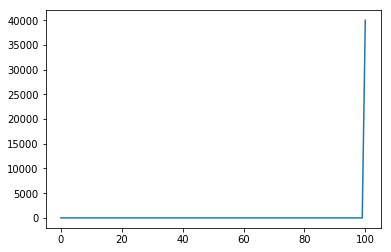

In [54]:
plt.plot(np.arange(v.shape[0]),v)

In [24]:
x,y= np.where(policy==1)

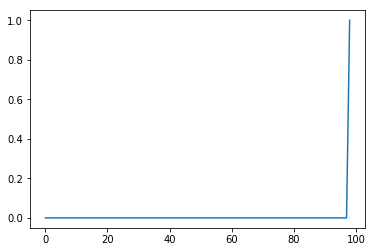

In [25]:
plt.plot(x,y)

In [30]:
np.where(policy==1)

(array([86, 86]), array([ 0, 11]))

In [36]:
for i in range(10):
    print(i)

0
1
2
3
4
5
6
7
8
9
